In [19]:
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.5.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp310-cp310-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp310-cp310-macosx_14_0_arm64.whl (23.1 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Step 1: Load the Housing Dataset
import pandas as pd

In [6]:
# Load the dataset
data = pd.read_csv("housing.csv")

In [8]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sale

In [14]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [13]:
# Step 1: Identify numeric columns
numeric_cols = data.select_dtypes(include=["number"]).columns

# Step 2: Fill missing values in numeric columns with the median of those columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Step 3: Display to check if missing values have been handled
print("Missing values after filling numeric columns with median:")
print(data.isnull().sum())

Missing values after filling numeric columns with median:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [15]:
# Step 2: Feature Selection and Data Preprocessing
# Select relevant features
features = data[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]]
target = data["SalePrice"]

In [20]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=0
)

In [21]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Step 3: Implement the Linear Regression Model
from sklearn.linear_model import LinearRegression

In [24]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict house prices on the test set
predictions = model.predict(X_test)

In [26]:
# Step 4: Evaluate the Model's Performance
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2506343555.770263
R-squared (R²): 0.6370695035608264


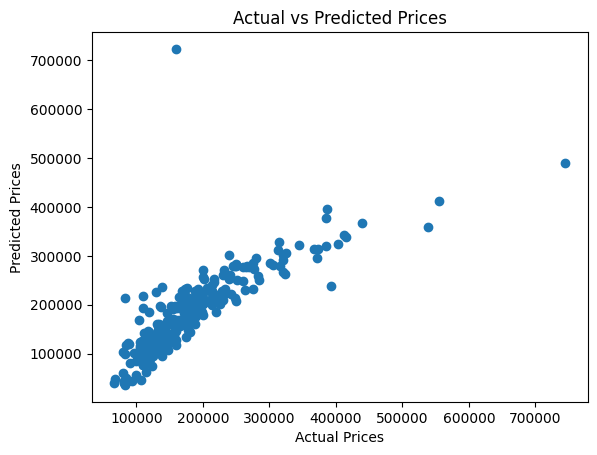

In [31]:
# Visualize the predicted prices vs the actual prices
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()